# **House Pricing Prediction Using Regression**


In [168]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from xgboost import XGBRegressor

pd.pandas.set_option('display.max_columns',0)

### **Data Analysis**

In [121]:
#Load dataset into a pandas dataframe
data = pd.read_csv('House Pricing.csv')
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [122]:
#Check the shape of the data
#Find the number of rows and columns in dataset
print('Shape of the data:',data.shape)

Shape of the data: (545, 13)


In [123]:
#Check number of records in total and number of records that has NaN values
num_nan_rows = data.isnull().sum(axis=1).astype(bool).sum()
total_rows = data.shape[0]
print('Number of records in total: {}\nNumber of records that has NaN values: {}'.format(total_rows, num_nan_rows))

Number of records in total: 545
Number of records that has NaN values: 0


In [124]:
#Print first 5 rows of data
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [125]:
#Show list of columns name of dataset
print('List of columns name: {}'.format(data.columns))

List of columns name: Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [126]:
#Show summary of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [127]:
#Check for missing values
print(data.isnull().sum())
#There is no missing values

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [128]:
#Unique values in dataset
for col in data.columns:
    print('Unique values in {} column are:'.format(col))
    print(data[col].unique())

Unique values in price column are:
[13300000 12250000 12215000 11410000 10850000 10150000  9870000  9800000
  9681000  9310000  9240000  9100000  8960000  8890000  8855000  8750000
  8680000  8645000  8575000  8540000  8463000  8400000  8295000  8190000
  8120000  8080940  8043000  7980000  7962500  7910000  7875000  7840000
  7700000  7560000  7525000  7490000  7455000  7420000  7350000  7343000
  7245000  7210000  7140000  7070000  7035000  7000000  6930000  6895000
  6860000  6790000  6755000  6720000  6685000  6650000  6629000  6615000
  6580000  6510000  6475000  6440000  6419000  6405000  6300000  6293000
  6265000  6230000  6195000  6160000  6125000  6107500  6090000  6083000
  6020000  5950000  5943000  5880000  5873000  5866000  5810000  5803000
  5775000  5740000  5652500  5600000  5565000  5530000  5523000  5495000
  5460000  5425000  5390000  5383000  5320000  5285000  5250000  5243000
  5229000  5215000  5145000  5110000  5075000  5040000  5033000  5005000
  4970000  49560

In [129]:
#Check the summary statistics of the data
print('Summary statistics of the data:\n', data.describe())

Summary statistics of the data:
               price          area  ...     stories     parking
count  5.450000e+02    545.000000  ...  545.000000  545.000000
mean   4.766729e+06   5150.541284  ...    1.805505    0.693578
std    1.870440e+06   2170.141023  ...    0.867492    0.861586
min    1.750000e+06   1650.000000  ...    1.000000    0.000000
25%    3.430000e+06   3600.000000  ...    1.000000    0.000000
50%    4.340000e+06   4600.000000  ...    2.000000    0.000000
75%    5.740000e+06   6360.000000  ...    2.000000    1.000000
max    1.330000e+07  16200.000000  ...    4.000000    3.000000

[8 rows x 6 columns]


In [135]:
#Get housing stats
total_houses=len(data)
max_value=data['price'].describe()['max']
min_value=data['price'].describe()['min']
print(json.dumps({
    'total_houses': total_houses,
    'max_value': max_value,
    'min_value': min_value,
}))

{"total_houses": 545, "max_value": 13300000.0, "min_value": 1750000.0}


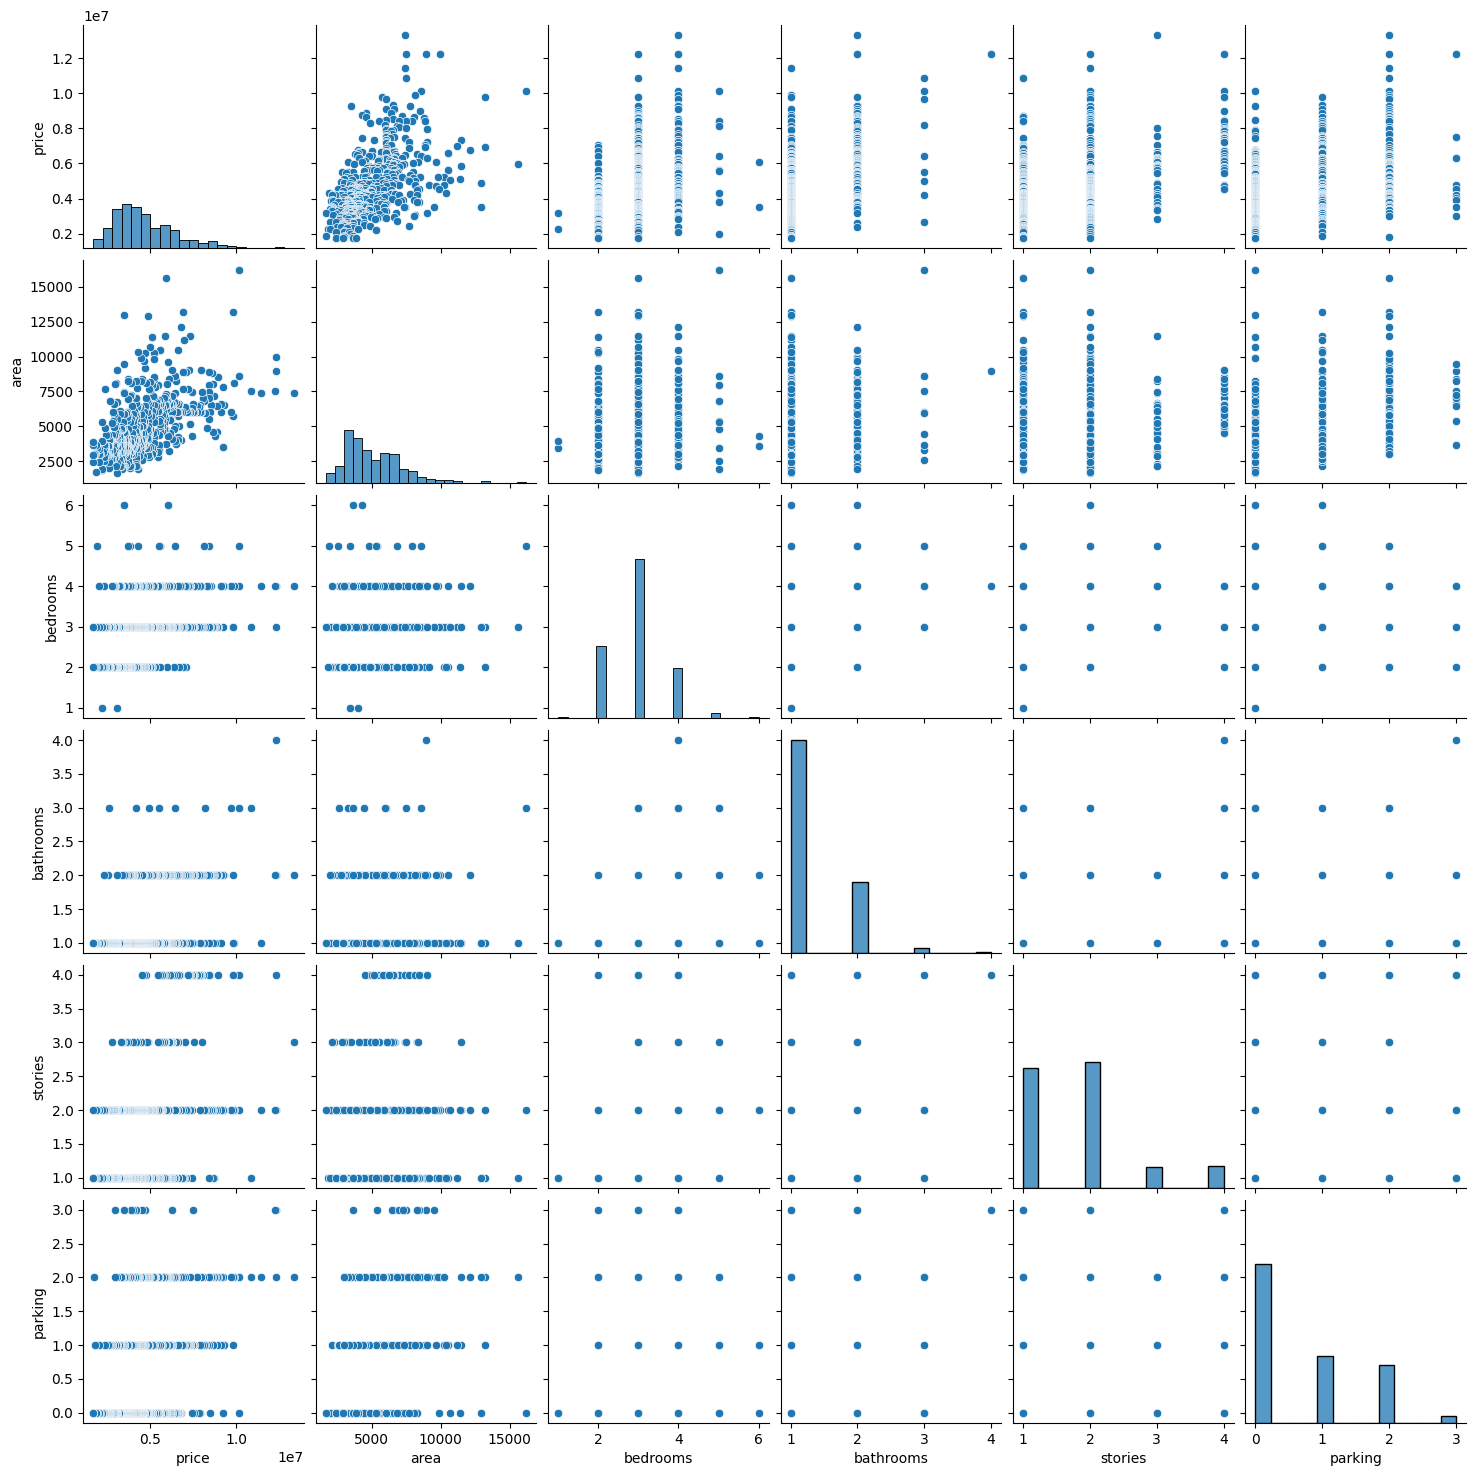

In [130]:
#Plot
sns.pairplot(data)

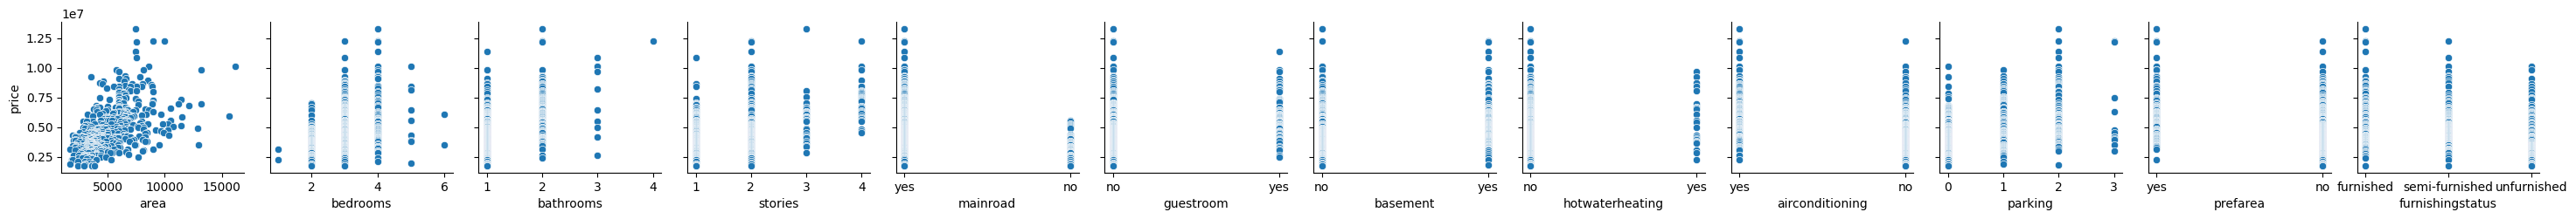

In [131]:
# Visualize the relationships between features and target variable
sns.pairplot(data, x_vars=data.drop(['price'], axis=1).columns, y_vars=['price'])
plt.show()

In [132]:
#Correlation between various features in the dataset
#Find correlation between all data columns
correlation = data.corr()
correlation

<ipython-input-132-34930d48896b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


<Axes: >

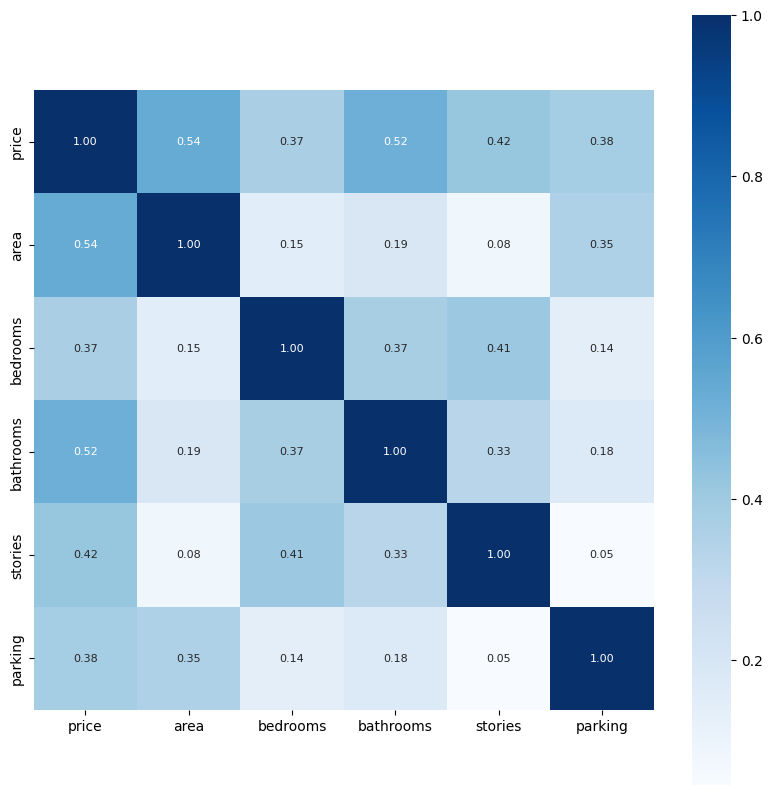

In [133]:
#Construct a heatmap to understand correlation
plt.figure(figsize = (10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':8}, cmap='Blues')

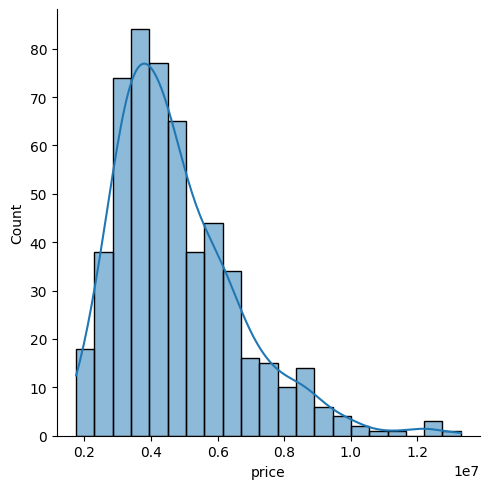

In [134]:
#Distribution of the target variable (Price)

sns.displot(data['price'], kde=True)
plt.show()
#Highest count is at the fourth box

# **Data Preprocessing**

In [136]:
#Check for missing values
print('Number of missing values:\n', data.isnull().sum())
#There is no missing values

Number of missing values:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [137]:
# Drop the rows with missing values
data.dropna(inplace=True)

In [138]:
#Change non numerical value to numerical value
data['mainroad'] = data['mainroad'].map({'yes': 1, 'no': 0})
data['guestroom'] = data['guestroom'].map({'yes': 1, 'no': 0})
data['basement'] = data['basement'].map({'yes': 1, 'no': 0})
data['hotwaterheating'] = data['hotwaterheating'].map({'yes': 1, 'no': 0})
data['airconditioning'] = data['airconditioning'].map({'yes': 1, 'no': 0})
data['prefarea'] = data['prefarea'].map({'yes': 1, 'no': 0})
data['furnishingstatus'] = data['furnishingstatus'].map({'unfurnished': 0, 'semi-furnished': 1, 'furnished': 2})

In [139]:
scaler = MinMaxScaler()
data['id'] = [i for i in range(len(data))]
id = data.pop('id')
data_normalized = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
data_normalized = pd.concat([data_normalized, id.reset_index(drop=True)], axis=1)
last_col = data_normalized.pop(data_normalized.columns[-1])
data_normalized.insert(0, last_col.name, last_col)
data_normalized.head(10)

,id,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,0,1.000000,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,1.0
1,1,0.909091,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,1.0
2,2,0.909091,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,0.5
3,3,0.906061,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,1.0
4,4,0.836364,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,1.0
5,5,0.787879,0.402062,0.4,0.666667,0.000000,1.0,0.0,1.0,0.0,1.0,0.666667,1.0,0.5
6,6,0.727273,0.476289,0.6,0.666667,1.000000,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,0.5
7,7,0.727273,1.000000,0.8,0.666667,0.333333,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
8,8,0.703030,0.443299,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,1.0,1.0
9,9,0.696970,0.281787,0.4,0.333333,1.000000,1.0,1.0,0.0,0.0,1.0,0.333333,1.0,0.0


In [140]:
#Save to csv
data_normalized.to_csv('cleaned_data_house.csv')

In [141]:
#Identify features and target variables
X=data_normalized.drop(['price'],axis=1)
y=data_normalized['price']
#Print both variables
print(X)
print(y)

      id      area  bedrooms  ...   parking  prefarea  furnishingstatus
0      0  0.396564       0.6  ...  0.666667       1.0               1.0
1      1  0.502405       0.6  ...  1.000000       0.0               1.0
2      2  0.571134       0.4  ...  0.666667       1.0               0.5
3      3  0.402062       0.6  ...  1.000000       1.0               1.0
4      4  0.396564       0.6  ...  0.666667       0.0               1.0
..   ...       ...       ...  ...       ...       ...               ...
540  540  0.092784       0.2  ...  0.666667       0.0               0.0
541  541  0.051546       0.4  ...  0.000000       0.0               0.5
542  542  0.135395       0.2  ...  0.000000       0.0               0.0
543  543  0.086598       0.4  ...  0.000000       0.0               1.0
544  544  0.151203       0.4  ...  0.000000       0.0               0.0

[545 rows x 13 columns]
0      1.000000
1      0.909091
2      0.909091
3      0.906061
4      0.836364
         ...   
540    0.006061

In [147]:
#Split the data into training data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Check the shape of the training and testing sets
print('Shape of training set:', X_train.shape, y_train.shape)
print('Shape of testing set:', X_test.shape, y_test.shape)

Shape of training set: (436, 13) (436,)
Shape of testing set: (109, 13) (109,)


# **Regression Model Development**
Model Training XGBRegressor

# XGBoost Regression

In [155]:
#loading model
model=XGBRegressor()

In [156]:
#training the model with X_train
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

# Prediction on training data

In [157]:
#accuracy for prediction on training data 
training_data_prediction = model.predict(X_train)
print(training_data_prediction)

[1.44244000e-01 2.18014315e-01 7.76961744e-02 2.72492617e-01
 2.24835560e-01 4.66859072e-01 1.02745712e-01 7.86286145e-02
 4.47740674e-01 2.62172759e-01 1.36697695e-01 1.02975808e-01
 3.68001819e-01 3.51191968e-01 5.30328095e-01 2.02924535e-01
 3.03368926e-01 2.57787615e-01 5.27224600e-01 2.12567627e-01
 2.12130010e-01 7.28080198e-02 3.02749306e-01 2.31415272e-01
 1.87732995e-01 1.92508161e-01 4.36161041e-01 6.48639858e-01
 2.57461786e-01 1.26325443e-01 1.74553469e-01 1.16956599e-01
 4.57110181e-02 2.13463336e-01 2.12159306e-01 1.04653426e-01
 2.72358358e-01 1.62859678e-01 1.22651597e-02 5.39853215e-01
 2.02333137e-01 9.08917844e-01 5.87193489e-01 4.84825313e-01
 1.98828220e-01 1.26382187e-01 2.21352458e-01 1.59460679e-01
 1.38486594e-01 6.07192218e-02 3.63578647e-01 2.03711197e-01
 1.83148891e-01 1.26705229e-01 2.06929028e-01 3.08078885e-01
 1.63490102e-01 1.75105199e-01 1.66854933e-01 2.07534924e-01
 4.84888315e-01 2.21070230e-01 3.68845284e-01 8.17616284e-02
 1.74953535e-01 3.264329

In [158]:
#R squared error
score_1 = metrics.r2_score(y_train, training_data_prediction)
print("R squared error: ",score_1)

#Mean absolute error(MAE)
score_2=metrics.mean_absolute_error(y_train, training_data_prediction)
print("Mean absolute error: ",score_2)

R squared error:  0.999952160688945
Mean absolute error:  0.0007632125106514726


# Visualizing the actual prices and predicted prices

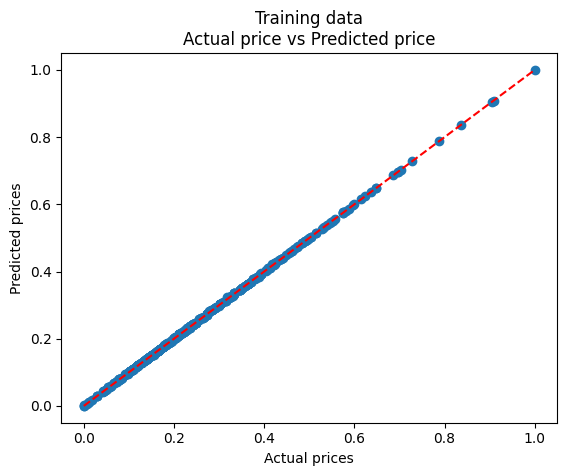

In [198]:
plt.scatter(y_train,training_data_prediction)
plt.plot([y_train.min(),y_train.max()],[y_train.min(),y_train.max()], 'r--')
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title("Training data\nActual price vs Predicted price")
plt.show()

# Prediction on Test data

In [160]:
#accuracy for prediction on training data 
test_data_prediction = model.predict(X_test)
print(test_data_prediction)

[0.1879593  0.4112805  0.12624493 0.1514557  0.323022   0.1513445
 0.3521396  0.1847365  0.13866362 0.15152115 0.21768048 0.1512764
 0.173918   0.28580463 0.48417684 0.33583802 0.42420867 0.1089808
 0.05648577 0.24281003 0.30366942 0.144244   0.29769397 0.3248046
 0.07093674 0.0010469  0.14258112 0.23798002 0.15141647 0.05522415
 0.18904647 0.21319632 0.23178107 0.334046   0.37900737 0.44605914
 0.07856554 0.4420095  0.29089826 0.10748149 0.35664436 0.07156873
 0.16937782 0.213025   0.10262653 0.16489843 0.14498243 0.27191666
 0.2725345  0.18786013 0.9076222  0.30352613 0.0564166  0.13536984
 0.10258976 0.3245863  0.6148881  0.25779563 0.02977268 0.18882133
 0.11729477 0.16734128 0.20743105 0.48488832 0.5752491  0.25822517
 0.24015333 0.27235925 0.12597749 0.20020972 0.27244925 0.29725623
 0.3783397  0.36366263 0.59848    0.12123714 0.3233153  0.23310944
 0.69953465 0.37834144 0.38421023 0.24644938 0.21369784 0.05659286
 0.13525642 0.16569214 0.5869222  0.5320463  0.27168065 0.28516284

In [161]:
#R squared error
score_3 = metrics.r2_score(y_test, test_data_prediction)
print("R squared error: ",score_3)

#Mean absolute error(MAE)
score_4=metrics.mean_absolute_error(y_test, test_data_prediction)
print("Mean absolute error: ",score_4)

R squared error:  0.9994239378695137
Mean absolute error:  0.002423394671524775


#Visualizing the actual prices and predicted prices

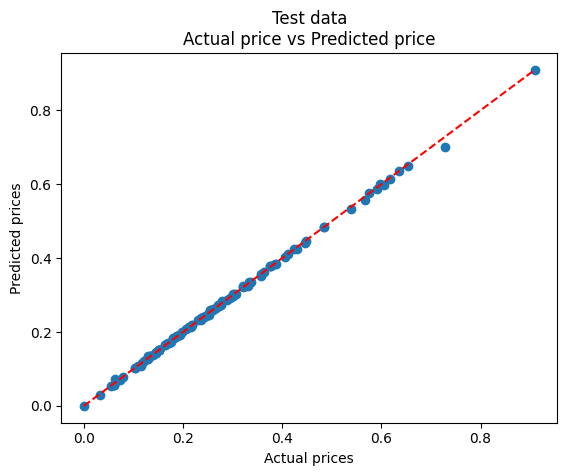

In [199]:
plt.scatter(y_test,test_data_prediction)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], 'r--')
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title("Test data\nActual price vs Predicted price")
plt.show()

# Linear Regression model

In [203]:
# Initialize the linear regression model
lr = LinearRegression()

# Train the model using the training dataset
lr.fit(X_train, y_train)

# Evaluate the model using the testing dataset
y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean squared error:', mse)
print('Root mean squared error:', rmse)
print('Mean absolute error:', mae)
print('R-squared:',r2)

# Experiment with different hyperparameters
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

# Initialize the ridge regression model
ridge = Ridge()

# Set up the hyperparameter grid
params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Tune hyperparameters using grid search
grid = GridSearchCV(ridge, params, cv=5)
grid.fit(X_train, y_train)

# Evaluate the model using the testing dataset
y_pred2 = grid.predict(X_test)

mse = mean_squared_error(y_test, y_pred2)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)


print('\nMean squared error:', mse)
print('Root mean squared error:', rmse)
print('Mean absolute error:', mae)
print('R-squared:',r2)

Mean squared error: 0.0031717412039154527
Root mean squared error: 0.056318213784844535
Mean absolute error: 0.03926731923101599
R-squared: 0.8807807182307247

Mean squared error: 0.003207130134998762
Root mean squared error: 0.05663152951314985
Mean absolute error: 0.03938296915009488
R-squared: 0.879450520501753


MSE: 0.0031717412039154527
RMSE: 0.056318213784844535
R2 Score: 0.8807807182307247


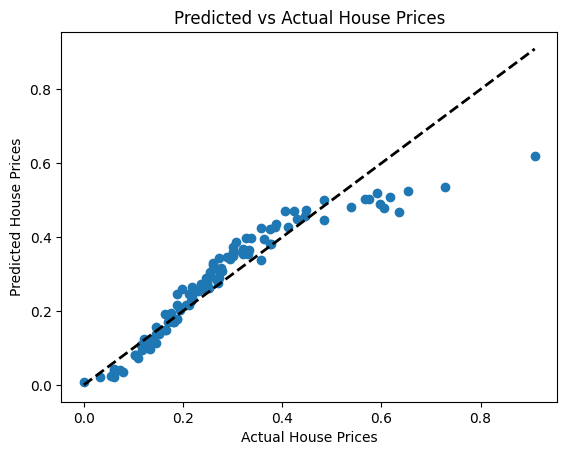

In [204]:
# Predict on test set
y_pred3 = model.predict(X_test)

# Calculate MSE, RMSE, and R2 score
mse = mean_squared_error(y_test, y_pred3)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred3)

print('MSE:', mse)
print('RMSE:', rmse)
print('R2 Score:', r2)

# Visualize predicted vs actual house prices using scatterplot
plt.scatter(y_test, y_pred3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Predicted vs Actual House Prices')
plt.show()
